# <div align="right">Machine Learning
### <div align="right"> *Followblindly*

# 11 - Bagging and Random Forest

## Ensemble Learning

---

**Ensemble methods** aim at improving the predictive performance of a given statistical learning or model ﬁtting technique. The general principle of ensemble methods is to construct a linear combination of some model ﬁtting method, instead of using a single ﬁt of the method. 

An ensemble is itself a **supervised learning** algorithm, because it can be trained and then used to make predictions. Ensemble methods combine several decision trees classifiers to produce better predictive performance than a single decision tree classifier. The main principle behind the ensemble model is that a group of weak learners come together to form a strong learner, thus increasing the accuracy of the model.When we try to predict the target variable using any machine learning technique, the main causes of difference in actual and predicted values are **noise**, **variance**, and **bias**. Ensemble helps to reduce these factors (except noise, which is irreducible error). The noise-related error is mainly due to noise in the training data and can't be removed. However, the errors due to bias and variance can be reduced. The total error can be expressed as follows:

$$
Total \ Error = Bias + Variance + Irreducible \ Error 
$$

A measure such as **mean square error (MSE)** captures all of these errors for a continuous target variable and can be represented as follows: 

$$
\begin{align*}
MSE &= E[(Y-\hat{f}(x))^{2}] \\
&= \underbrace{[E[\hat{f}(x)]-f(x)]^{2}}_{Bias} + \underbrace{E[(\hat{f}(x)-E[\hat{f}(x)])^{2}]}_{Variance} + \underbrace{\varepsilon}_{Noise}
\end{align*}
$$

Using techniques like Bagging and Boosting helps to decrease the variance and increase the robustness of the model. Combinations of multiple classifiers decrease variance, especially in the case of unstable classifiers, and may produce a more reliable classification than a single classifier. 

### Ensemble Algorithm 

The goal of ensemble algorithms is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator. 

<img src="11_images/11_Ensemble_Algorithm.PNG" width=600px/>

There are two families of ensemble methods which are usually distinguished:

1. **Averaging methods.** The driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.

* **Examples:** Bagging methods, Forests of randomized trees. 

2. **Boosting methods.** Base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

* **Examples:** AdaBoost, Gradient Tree Boosting.

### Advantages of Ensemble Algorithm 

* Ensemble is a proven method for improving the accuracy of the model and works in most of the cases. 
* Ensemble makes the model more robust and stable thus ensuring decent performance on the test cases in most scenarios. 
* You can use ensemble to capture linear and simple as well nonlinear complex relationships in the data. This can be done by using two different models and forming an ensemble of two. 

### Disadvantages of Ensemble Algorithm 

* Ensemble reduces the model interpret-ability and makes it very difficult to draw any crucial business insights at the end 
* It is time-consuming and thus might not be the best idea for real-time applications 
* The selection of models for creating an ensemble is an art which is really hard to master 

## Bootstrap Sampling 

---

Sampling is the process of selecting a subset of observations from the population with the purpose of estimating some parameters about the whole population. Resampling methods, on the other hand, are used to improve the estimates of the population parameters. In machine learning, the bootstrap method refers to random sampling with replacement. This sample is referred to as a resample. This allows the model or algorithm to get a better understanding of the various biases, variances and features that exist in the resample. Taking a sample of the data allows the resample to contain different characteristics then it might have contained as a whole.

Bootstrapping is also great for **small size** data sets that can have a tendency to overfit. In fact, we recommended this to one company who was concerned because their data sets were far from “Big Data”. Bootstrapping can be a solution in this case because algorithms that utilize bootstrapping can be more robust and handle new data sets depending on the methodology chosen(boosting or bagging). The reason behind using the bootstrap method is because it can test the stability of a solution. By using multiple sample data sets and then testing multiple models, it can increase robustness. Perhaps one sample data set has a larger mean than another, or a different standard deviation. This might break a model that was overfit, and not tested using data sets with different variations. 

One of the many reasons bootstrapping has become very common is because of the increase in computing power. This allows for many times more permutations to be done with different resamples than previously. Bootstrapping is used in both Bagging and Boosting.

<img src="11_images/11_bootstrap.PNG" width=600px/>

Assume we have a sample of '$n$' values ($x$) and we’d like to get an estimate of the mean of the sample.

$$
mean(x) = \frac{1}{n} \times sum(x)
$$

Consider a sample of 100 values (x) and we’d like to get an estimate of the mean of the sample. We know that our sample is small and that the mean has an error in it. We can improve the estimate of our mean using the bootstrap procedure: 

1. Create many (e.g. 1000) random sub-samples of the data set with replacement (meaning we can select the same value multiple times). 
2. Calculate the mean of each sub-sample 
3. Calculate the average of all of our collected means and use that as our estimated mean for the data 

## Bagging

---

**B**ootstrap **AG**gregation, also known as **Bagging**, is a powerful ensemble method that was proposed by Leo Breiman in 1994 to prevent overfitting. The concept behind bagging is to combine the predictions of several base learners to create a more accurate output. Bagging is the application of the Bootstrap procedure to a high-variance machine learning algorithm, typically decision trees. 

<img src="11_images/11_Bagging.PNG" width=600px/>

1. Suppose there are N observations and M features. A sample from observation is selected randomly with replacement (Bootstrapping). 
2. A subset of features are selected to create a model with sample of observations and subset of features. 
3. Feature from the subset is selected which gives the best split on the training data. 
4. This is repeated to create many models and every model is trained in parallel 
5. Prediction is given based on the aggregation of predictions from all the models. 

This approach can be used with machine learning algorithms that have a **high variance**, such as decision trees. A separate model is trained on each bootstrap sample of data and the average output of those models used to make predictions. This technique is called bootstrap aggregation or bagging for short. Variance means that an algorithm’s performance is sensitive to the training data, with high variance suggesting that the more the training data is changed, the more the performance of the algorithm will vary. 

The performance of high variance machine learning algorithms like unpruned decision trees can be improved by training many trees and taking the average of their predictions. Results are often better than a single decision tree. What Bagging does is help **reduce variance** from models that are might be very accurate, but only on the data they were trained on. This is also known as **overfitting**. Bagging gets around this by creating its own variance amongst the data by sampling and replacing data while it tests multiple hypothesis(models). In turn, this reduces the noise by utilizing multiple samples that would most likely be made up of data with various attributes(median, average, etc). 

Once each model has developed a hypothesis. The models use voting for classification or averaging for regression. This is where the "Aggregating" in "Bootstrap Aggregating" comes into play. Each hypothesis has the **same weight** as all the others. Essentially, all these models run at the same time, and vote on which hypothesis is the most accurate. This helps to decrease variance i.e. reduce the overfit. 

### Baging for Classification

Consider a classification problem with $K$ classes. When averaging over the $B$ bootstrap samples, there are two options and conflicting advice

* **Option 1:** use the majority of votes (consensus estimate)
    * This is the only option mentioned in James et al.

* **Option 2:** average the proportions from the individual classifiers and choose class with greatest average proportion
    * The bagged predictor is the class with the largest average proportion:
    
$$
\hat{G}_{bag}(x) = argmax_{k} \hat{f_{k}}(x)
$$
 
Where $\hat{f_{k}}$ is the average proportion for class $k$
    
$$
\hat{f_{k}} = \frac{1}{B}\sum_{b=1}^{B}\hat{p_{b}}(x)
$$
Where $p_{b}$ is the proportion in the corresponding terminal leaf for bag $b$.

### Advantages of Bagging

* Bagging takes advantage of ensemble learning wherein multiple weak learners outperform a single strong learner.  
* It helps reduce variance and thus helps us avoid overfitting. 

### Disadvantages of Bagging

* There is loss of interpretability of the model. 
* There can possibly be a problem of high bias if not modeled properly. 
* While bagging gives us more accuracy, it is computationally expensive and may not be desirable depending on the use case. 

## Random Forest

---

Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

The random forest is a model made up of many decision trees. Rather than just simply averaging the prediction of trees (which we could call a “forest”), this model uses two key concepts that gives it the name random: 

1. Random sampling of training data points when building trees 
2. Random subsets of features considered when splitting nodes 

<img src="11_images/11_Random_Forest.PNG" width=550px/>

The basic steps involved in performing the random forest algorithm are mentioned below: 

1. Pick N random records from the dataset. 
2. Build a decision tree based on these N records. 
3. Choose the number of trees you want in your algorithm and repeat steps 1 and 2. 
4. In case of a regression problem, for a new record, each tree in the forest predicts a value for Y (output). The final value can be calculated by taking the average of all the values predicted by all the trees in the forest. Or, in the case of a classification problem, each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote. 

### Advantages of Random Forest

* Random forest algorithm is unbiased as there are multiple trees and each tree is trained on a subset of data.  
* Random Forest algorithm is very stable. Introducing a new data in the dataset does not affect much as the new data impacts one tree and is pretty hard to impact all the trees. 
* The random forest algorithm works well when you have both categorical and numerical features. 
* With missing values in the dataset, the random forest algorithm performs very well. 

### Disadvantages of Random Forest

* A major disadvantage of random forests lies in their complexity. More computational resources are required and also results in the large number of decision trees joined together. 
* Due to their complexity, training time is more compared to other algorithms. 

## Implementing Bagging and Random Forest from sklearn

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

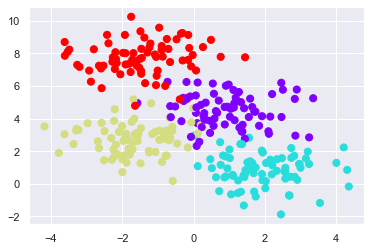

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [4]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [5]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/Users/followblindly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


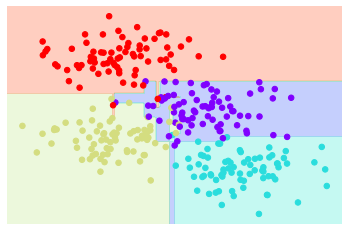

In [6]:
visualize_classifier(DecisionTreeClassifier(), X, y)

/Users/followblindly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


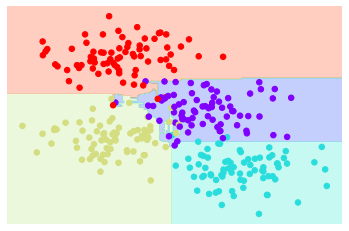

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

/Users/followblindly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


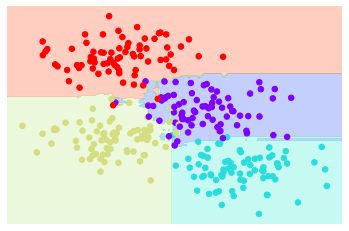

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

## Reference

[1]$\ \ \ \$ VanderPlas, J. (n.d.). In-Depth: Decision Trees and Random Forests. In-Depth: Decision Trees and Random Forests | Python Data Science Handbook. https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html. 

[2]$\ \ \ \$ Sarkar, P., S, A., &amp; Shah, P. (2019, October 14). Bagging and Random Forest in Machine Learning: How do they work? Knowledgehut. https://www.knowledgehut.com/blog/data-science/bagging-and-random-forest-in-machine-learning. 